In [1]:
name = "Vilho Pesonen"
id = 2524346

In [2]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_04_Signals.csv


In [3]:
# Run if needed
#%pip install numpy pandas matplotlib scipy

In [4]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [5]:
# Print the list of files in the ./data directory
os.listdir('./data')

['bidmc_02_Fix.txt',
 'bidmc_02_Signals.csv',
 'bidmc_03_Fix.txt',
 'bidmc_03_Signals.csv',
 'bidmc_04_Fix.txt',
 'bidmc_04_Signals.csv',
 'bidmc_06_Fix.txt',
 'bidmc_06_Signals.csv',
 'bidmc_08_Fix.txt',
 'bidmc_08_Signals.csv',
 'bidmc_09_Fix.txt',
 'bidmc_09_Signals.csv']

In [6]:
# Read the data
data = pd.read_csv(filename)

# Get PPG signal and create time vector
ppg = data[' PLETH']
ts = 0.008 # Sample time in seconds
fs = 1/ts # Sample rate (Hz), samples per second
t = np.arange(len(ppg))*ts
print(data)

       Time [s]     RESP    PLETH        II        V      AVR     ABP
0         0.000 -0.29819  0.67253 -0.294920  0.72157  1.02160  44.785
1         0.008 -0.29819  0.69892 -0.339840  0.94706  1.09610  44.785
2         0.016 -0.29518  0.72336 -0.148440  1.02160  1.00590  44.980
3         0.024 -0.29518  0.74291 -0.089844  1.03730  0.97647  44.980
4         0.032 -0.29518  0.75758 -0.054688  1.04710  0.96078  44.980
...         ...      ...      ...       ...      ...      ...     ...
59996   479.970 -0.29217  0.29814 -0.003906  1.03140  0.91569  50.261
59997   479.980 -0.29217  0.29912  0.000000  1.04120  0.91569  49.870
59998   479.980 -0.29217  0.30108 -0.003906  1.03730  0.91569  49.479
59999   479.990 -0.29217  0.30205  0.009766  1.03140  0.90588  49.087
60000   480.000 -0.28916  0.30205  0.000000  1.04710  0.91569  48.696

[60001 rows x 7 columns]


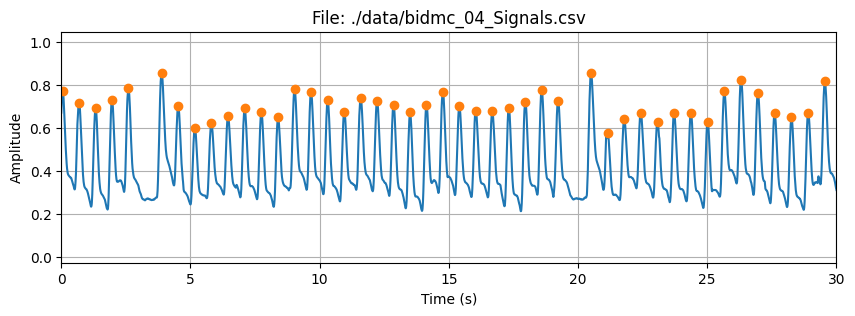

In [7]:

#peaks of the signal
peaks, properties = find_peaks(ppg, height=0.5, distance=50)
# Plot the ppg signal and the peaks
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.plot(t[peaks], ppg[peaks], 'o')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 30)

plt.grid()
plt.show()

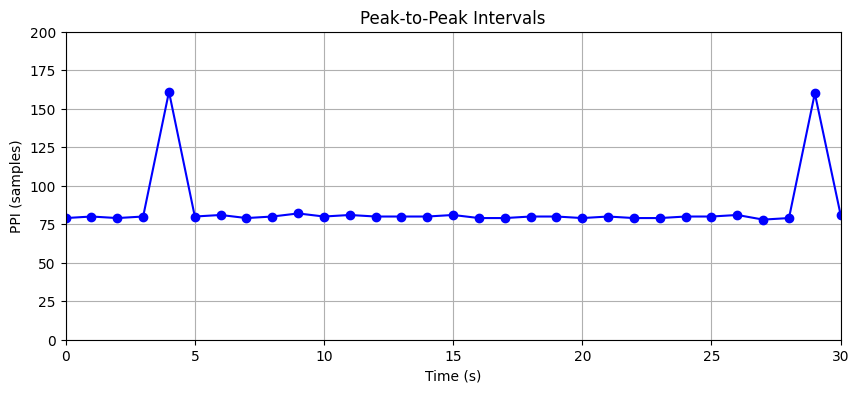

In [8]:
    # Continue coding here ...

#PLOTTING THE PPI
#calculating ppi
ppi = np.diff(peaks)


plt.figure(figsize=(10, 4))
plt.plot( ppi, 'b-o', label='PPI')

plt.xlabel('Time (s)')
plt.ylabel('PPI (samples)')
plt.title('Peak-to-Peak Intervals')

plt.xlim(0, 30)
plt.ylim(0, 200)

plt.grid(True)
plt.show()


In [9]:
# Remember to add your interpretations ...
   # Continue coding here ...

#peaks of the signal
peaks, properties = find_peaks(ppg, height=0.5, distance=50)
# Plot the ppg signal and the peaks

# Zoom in from 100 to 130 seconds
ppi_samples = np.diff(peaks)
ppi_ms = ppi_samples * (1000 / fs)


mean_ppi = np.mean(ppi_ms)
mean_hr = 60000 / mean_ppi
sdnn = np.std(ppi_ms)
diff_ppi = np.diff(ppi_ms)
rmssd = np.sqrt(np.mean(diff_ppi**2))

print(f"Mean PPI: {mean_ppi:.2f} ms")
print(f"Mean HR:  {mean_hr:.2f} BPM")
print(f"SDNN:     {sdnn:.2f} ms")
print(f"RMSSD:    {rmssd:.2f} ms")

Mean PPI: 675.63 ms
Mean HR:  88.81 BPM
SDNN:     189.83 ms
RMSSD:    268.62 ms


In [10]:
'''
1. Was the mean heart rate (in BPM) low or high?
high

2. Was the mean PPI (in milliseconds) low or high?
low

3. How much variation was there in the PPI values (SDNN and RMSSD)?
There was extreme variation. The SDNN was ~190 ms and RMSSD was ~269 ms.

4. Was the variation low or high?
It was exceptionally high. These values are roughly 5–10 times higher than the normal reference values for a healthy 78-year-old male (normally RMSSD is ~20–45 ms).

5. Compare these values to the given normal values (see the lecture notes) and interpret the
recovery and/or stress level of the patient.
patients levels are high. Patient does not have good recovery or low stress level.
'''


'\n1. Was the mean heart rate (in BPM) low or high?\nhigh\n\n2. Was the mean PPI (in milliseconds) low or high?\nlow\n\n3. How much variation was there in the PPI values (SDNN and RMSSD)?\nThere was extreme variation. The SDNN was ~190 ms and RMSSD was ~269 ms.\n\n4. Was the variation low or high?\nIt was exceptionally high. These values are roughly 5–10 times higher than the normal reference values for a healthy 78-year-old male (normally RMSSD is ~20–45 ms).\n\n5. Compare these values to the given normal values (see the lecture notes) and interpret the\nrecovery and/or stress level of the patient.\npatients levels are high. Patient does not have good recovery or low stress level.\n'